# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
!pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.7/557.7 kB 8.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559686 sha256=e04bd8d8763ea8739802756787f712e5d2e9dd86c1ee6d1d53027bb721a1a726
  Stored in directory: /Users/kevinburke/Library/Caches/pip/wheels/d9/dd/68/8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | krasnoselkup
Processing Record 4 of Set 1 | sines
Processing Record 5 of Set 1 | madimba
Processing Record 6 of Set 1 | mehamn
Processing Record 7 of Set 1 | fort nelson
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | santa fe
Processing Record 10 of Set 1 | norman wells
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | badaojiang
City not found. Skipping...
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 1 | cherskiy
Processing Record 18 of Set 1 | mount isa
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | her

Processing Record 36 of Set 4 | port lincoln
Processing Record 37 of Set 4 | charters towers
Processing Record 38 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 39 of Set 4 | lagoa
Processing Record 40 of Set 4 | abancay
Processing Record 41 of Set 4 | berlevag
Processing Record 42 of Set 4 | solnechnyy
Processing Record 43 of Set 4 | katsuura
Processing Record 44 of Set 4 | sungairaya
Processing Record 45 of Set 4 | boke
Processing Record 46 of Set 4 | longhua
Processing Record 47 of Set 4 | kavieng
Processing Record 48 of Set 4 | anloga
Processing Record 49 of Set 4 | cayenne
Processing Record 0 of Set 5 | guarapari
Processing Record 1 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 2 of Set 5 | dikson
Processing Record 3 of Set 5 | rio grande
Processing Record 4 of Set 5 | khormuj
City not found. Skipping...
Processing Record 5 of Set 5 | pandan
Processing Record 6 of Set 5 | kalmunai
Processing Record 7 of Set 5 | neuquen
Processing Record 8 of

Processing Record 25 of Set 8 | komsomolskiy
Processing Record 26 of Set 8 | dobryatino
Processing Record 27 of Set 8 | jibuti
Processing Record 28 of Set 8 | ganzhou
Processing Record 29 of Set 8 | tilichiki
Processing Record 30 of Set 8 | nakhon nayok
Processing Record 31 of Set 8 | praia
Processing Record 32 of Set 8 | dzaoudzi
Processing Record 33 of Set 8 | nouadhibou
Processing Record 34 of Set 8 | sao felix do xingu
Processing Record 35 of Set 8 | vilyuysk
Processing Record 36 of Set 8 | nemuro
Processing Record 37 of Set 8 | fayaoue
Processing Record 38 of Set 8 | luqiao
Processing Record 39 of Set 8 | necochea
Processing Record 40 of Set 8 | vila do maio
Processing Record 41 of Set 8 | hvammstangi
City not found. Skipping...
Processing Record 42 of Set 8 | sabha
Processing Record 43 of Set 8 | kaspiysk
Processing Record 44 of Set 8 | solton
Processing Record 45 of Set 8 | belem
Processing Record 46 of Set 8 | miranorte
City not found. Skipping...
Processing Record 47 of Set 8 

Processing Record 14 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 12 | turbat
Processing Record 16 of Set 12 | manaure
Processing Record 17 of Set 12 | mabaruma
Processing Record 18 of Set 12 | rocha
Processing Record 19 of Set 12 | elk city
Processing Record 20 of Set 12 | mezen
Processing Record 21 of Set 12 | dzilam gonzalez
Processing Record 22 of Set 12 | bijar
Processing Record 23 of Set 12 | sao jose dos pinhais
Processing Record 24 of Set 12 | villa bruzual
Processing Record 25 of Set 12 | manzil tamim
City not found. Skipping...
Processing Record 26 of Set 12 | channel-port aux basques
Processing Record 27 of Set 12 | nahrin
Processing Record 28 of Set 12 | xiongzhou
Processing Record 29 of Set 12 | ereymentau
Processing Record 30 of Set 12 | grindavik
Processing Record 31 of Set 12 | korla
Processing Record 32 of Set 12 | goderich
Processing Record 33 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 34 of Set 12 | arcata
Pro

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,26.18,80,20,6.69,US,1675716197
1,college,64.8569,-147.8028,-14.39,74,75,1.54,US,1675716198
2,krasnoselkup,65.7000,82.4667,-20.71,99,99,2.11,RU,1675716199
3,sines,37.9562,-8.8698,12.38,83,2,2.34,PT,1675716199
4,madimba,-10.4000,40.3333,27.62,83,75,4.63,TZ,1675716199


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,26.18,80,20,6.69,US,1675716197
1,college,64.8569,-147.8028,-14.39,74,75,1.54,US,1675716198
2,krasnoselkup,65.7000,82.4667,-20.71,99,99,2.11,RU,1675716199
3,sines,37.9562,-8.8698,12.38,83,2,2.34,PT,1675716199
4,madimba,-10.4000,40.3333,27.62,83,75,4.63,TZ,1675716199


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

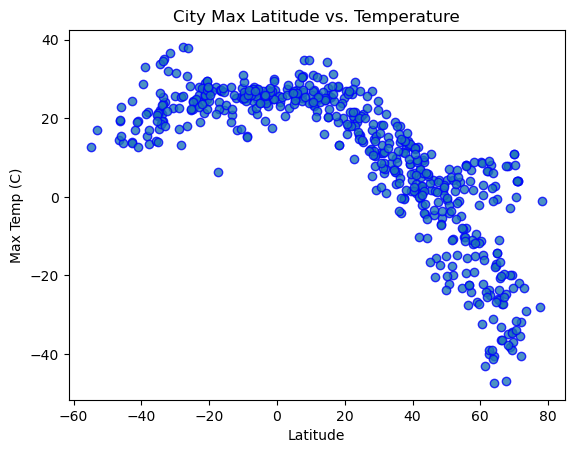

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="blue",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"   
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

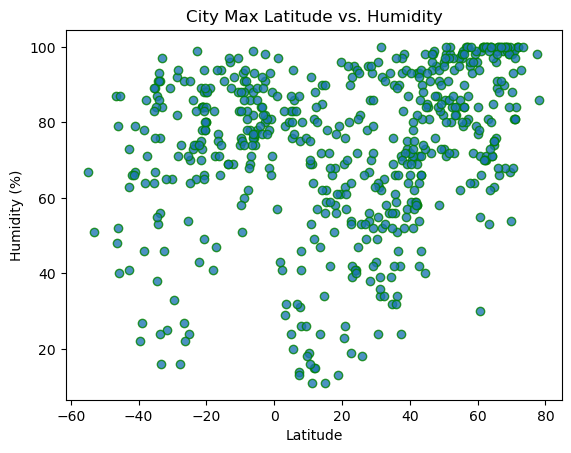

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"   
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

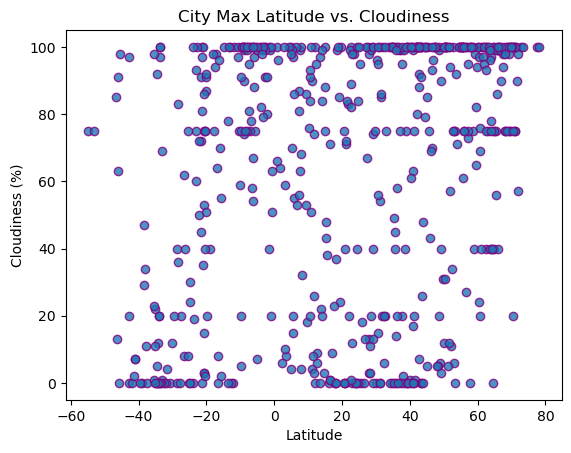

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="purple",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"   
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

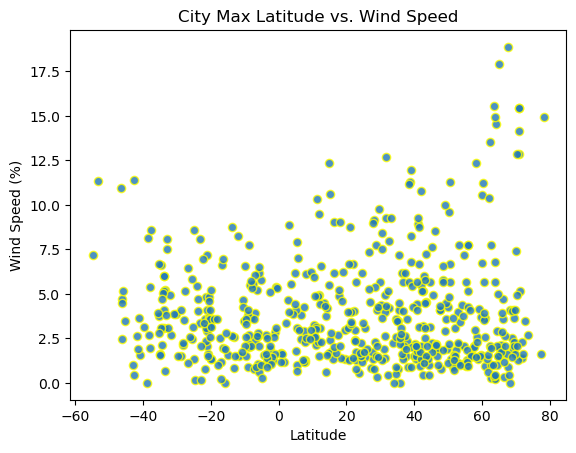

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="yellow",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"   
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
    
    # Compute linear regression
    (slope,intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    plt.show()
    print(f"The r-value is {rvalue **2}")
   
          

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,26.18,80,20,6.69,US,1675716197
1,college,64.8569,-147.8028,-14.39,74,75,1.54,US,1675716198
2,krasnoselkup,65.7000,82.4667,-20.71,99,99,2.11,RU,1675716199
3,sines,37.9562,-8.8698,12.38,83,2,2.34,PT,1675716199
5,mehamn,71.0357,27.8492,3.97,81,75,15.43,NO,1675716200


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,madimba,-10.4000,40.3333,27.62,83,75,4.63,TZ,1675716199
8,santa fe,-31.6333,-60.7000,36.68,25,4,2.68,AR,1675715950
10,busselton,-33.6500,115.3333,19.21,76,97,5.22,AU,1675715981
11,hobart,-42.8794,147.3294,14.03,73,20,1.03,AU,1675716201
15,mount isa,-20.7333,139.5000,24.87,94,75,3.09,AU,1675716202


###  Temperature vs. Latitude Linear Regression Plot

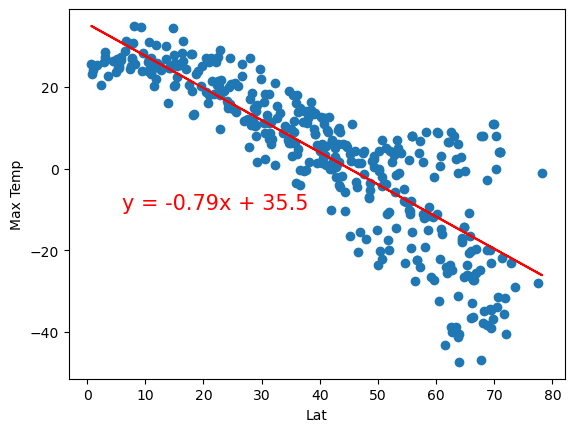

The r-value is 0.7082735528377173


In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

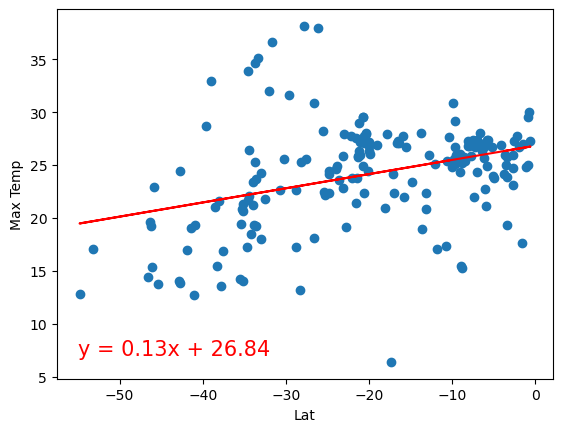

The r-value is 0.12534179210212115


In [56]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55,7))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

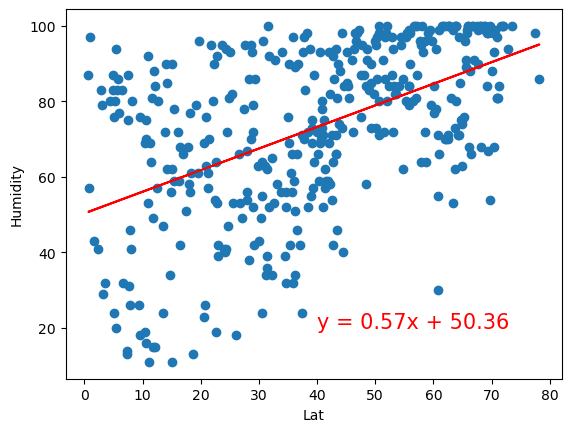

The r-value is 0.2622829377194271


In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (40,20))

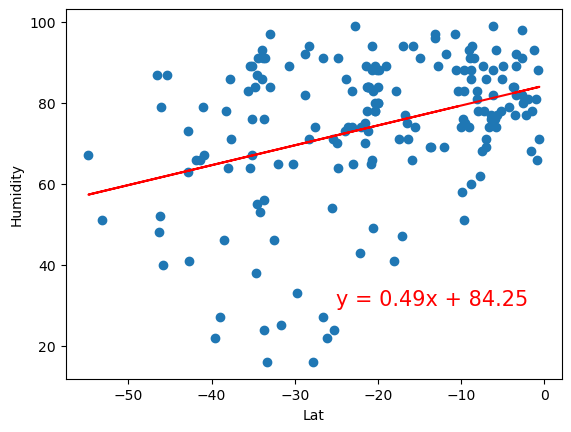

The r-value is 0.1284400388992663


In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-25,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

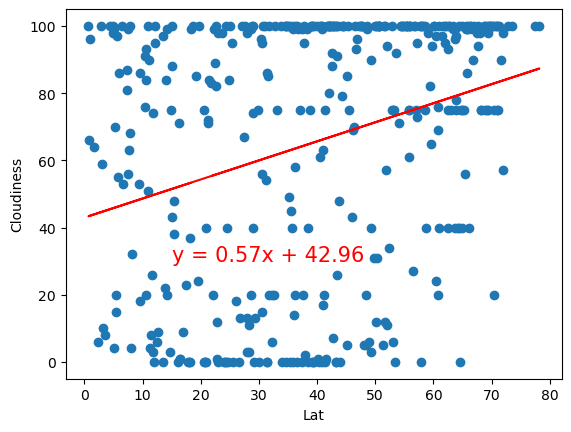

The r-value is 0.08689042251942876


In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (15,30))

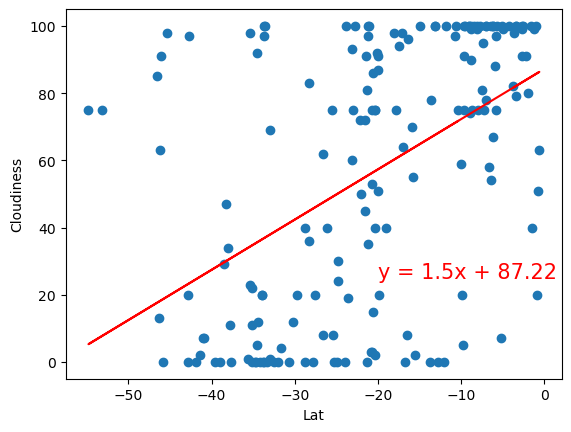

The r-value is 0.2488964464791155


In [63]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-20,25))

### Wind Speed vs. Latitude Linear Regression Plot

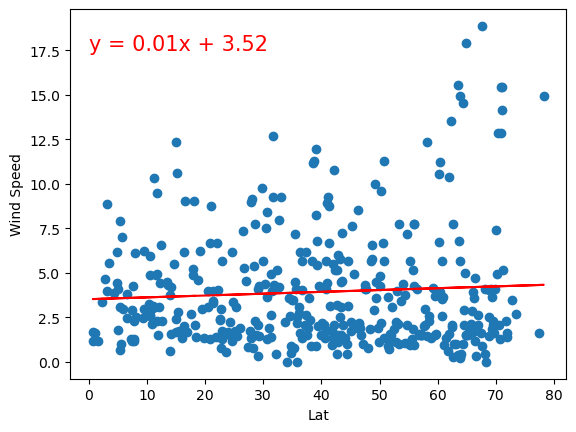

The r-value is 0.0039001224184350143


In [65]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (0,17.5))

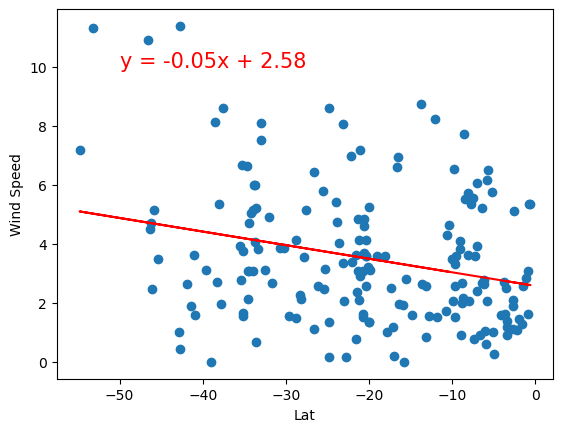

The r-value is 0.07188727764719872


In [67]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE